In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

# URL
url = "https://u.gg/lol/tier-list"

options = Options()
options.add_argument("--headless")
options.binary_location = "C:\\Users\\nicol\\Downloads\\chrome-win64\\chrome-win64\\chrome.exe"

service = Service("C:\\Users\\nicol\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)

driver.get(url)

wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.rt-tr-group")))

# Initialize list to store each row of data
data = []

# Get page source and create BeautifulSoup object
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the driver
driver.quit()

# Get the specific element using BeautifulSoup
element = soup.select_one("div.rt-tr-group:nth-child(1) > div:nth-child(1)")

try:
    text = element.get_text(strip=True) if element else 'N/A'
    data.append([text])
        
except Exception as e:
    print(f"Error: {e}")

# Convert the data to a DataFrame
columns = ['ElementText']
df_new = pd.DataFrame(data, columns=columns)

df_new.head()

,ElementText
0,"1SwainS54.03%2.1%19,893"


In [3]:
df_new

,ElementText
0,"1SwainS54.03%2.1%19,893"


In [4]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt

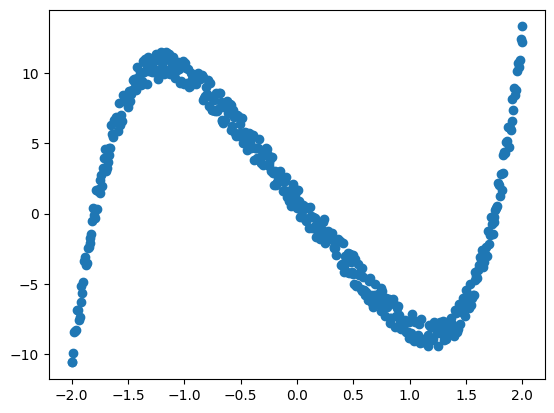

In [5]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [6]:
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())

In [7]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)

In [8]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

- MSE : 0.90, KL : 11.14


In [10]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [11]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

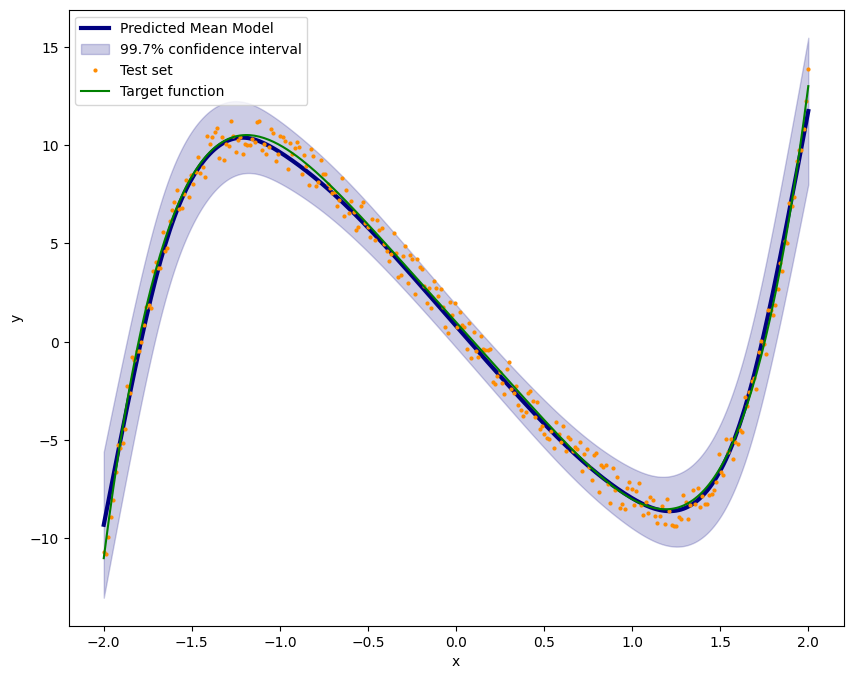

In [12]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')